<a href="https://colab.research.google.com/github/VfrMark/Projeto_final_gauss_mix/blob/main/Projeto_final_MTM3587_08222_vers%C3%A3o_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução a Modelos de Mistura Gaussiana

Neste notebook visa-se apresentar uma introdução aos __modelos de mistura gaussiana__, trazendo conceitos tanto teóricos, como práticos. 

Você verá: 

* Intuição dos __modelos de mistura gaussiana__
* Hipóteses assumidas para a construção do modelo
* Fundamentação matemática e probabilística
* Prós e contrás desse tipo de modelo
* Aplicação prática com a biblioteca sklearn.

Esse trabalho faz parte do projeto final do curso de Machine Learning oferecido na Universidade Federal de Santa Catarina lecionado pelo Professor Edson Cilos.

Você também poderá encontrar o curso [aqui](https://www.udemy.com/course/edson-cilos-ml/).

#Introdução

Nosso objetivo ao criar um modelo é, em geral, conseguir representar e explicar os dados de alguma forma. Além de modelos de regressão, classificação e redução de dimensionalidade, há também os modelos de estimativa de densidade.

Em estimativa de densidade representa-se os dados de forma compacta utilizando uma densidade de uma família paramétrica de distribuição de probabilidade, como distribuição Gaussiana ou Beta (Deisenroth et al., 2020).

Por exemplo, podemos encontrar a média e variância de um conjunto de dados a fim de representar os dados de forma compacta por meio de uma distribuição Gaussiana, e com essa média e variância inferir uma distribuição subjacente aos dados. Assim, podemos pensar que o conjunto de dados é uma representação de uma amostra retirada a partir dessa distribuição. (Deisenroth et al., 2020)

Nesse notebook veremos __modelos de mistura gaussiana__, que visam explicar os dados por meio de uma união de distribuições normais (gaussianas) de probabilidade.

#Conceitos iniciais


Vamos iniciar apresentando o conceito de _Hard Assignment_ vs _Soft Assignment_.

Intuitivamente, para um problema de classificaçãoo com _Hard Assignment_ um dado pertence somente a uma classe, esse dado é 100% da classe atribuida a ele. 

Por exemplo, o algoritmo _K-means_ calcula o vizinho mais próximo e atribui à nova instância a classe desse vizinho.

Já para o _soft assignment_ podemos pensar como um dado podendo pertence parcialmente a diferentes classes.

Por exemplo uma nova instância do seu conjunto de dados pode pertencer 70% a classe __A__ e 30% a classe __B__. Isso é feito atribuindo um _score_/valor de probabilidade desse dados pertencer a cada conjunto.

###Vejamos o seguinte exemplo

Para simplificar a visualização, vejamos o caso onde temos dados em apenas uma dimensão e distribuições gaussianas quaisquer.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  from ipykernel import kernelapp as app


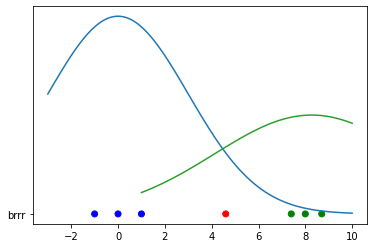

In [ ]:
#Código apenas para gerar exemplos, valores aleatórios.

from matplotlib import pyplot as mp
import numpy as np

def gaussian(x,x0,sigma):
  return np.exp(-np.power((x - x0)/sigma, 2.)/2.)


x_values = np.linspace(-3, 10, 120)
x_values_2 = np.linspace(1, 10, 120)

mp.plot(x_values, gaussian(x_values, 0, 3), ['brrr'])
mp.plot(x_values_2, (1/2)*gaussian(x_values, 7.5, 6))
mp.scatter([-1,0, 1,4.6,7.4,8,8.7], [0,0,0,0,0,0,0], c='bbbrggg')

mp.show()

Os pontos em azul tem mais probabilidade de pertencer a distribuição azul e os verdes tem mais probabilidade de ser da verde. 

Ou seja, é mais provavel que os pontos azuis sejam amostras da variável aleatória que é descrita pela distribuição azul, e analogamente para o verde.

Agora veja o ponto vermelho, está na intersecção entre essas distribuições, é um ponto 50% azul e 50% verde.

O objetivo do __modelo de mistura gaussiana__ é construir uma distribuição que é uma combinação/mistura de distribuições gaussianas, como a azul e verde do exemplo, para modelar os dados.

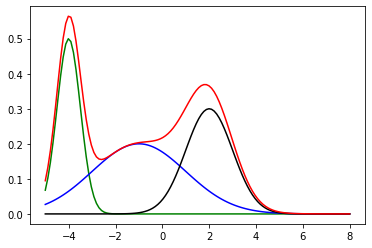

In [ ]:
#Exemplos construído a partir do livro Mathematics for Machine Learning.

x_values2 = np.linspace(-5, 8, 120)

mp.plot(x_values2, (1/2)*gaussian(x_values, -2, 1/2), color='g')
mp.plot(x_values2, (0.2)*gaussian(x_values, 1, 2), color='b')
mp.plot(x_values2, (0.3)*gaussian(x_values, 4, 1), color='black')

mp.plot(x_values2, (1/2)*gaussian(x_values, -2, 1/2) + (0.2)*gaussian(x_values, 1, 2) + (0.3)*gaussian(x_values, 4, 1), color='r')

mp.show()

Assim, a linha vermelha é uma distribuição que é combinação das três outras combinações gaussianas.

#Formulação matemática

Após entender conceitualmente como esse modelo funciona, vamos definí-lo formalmente.

Seja o conjunto de dados não rotulados $\mathcal{X} = \{x^{(1)}, x^{(2)}, \cdots, x^{(N)}\}$, onde $x^{(i)} = (x^{(i)}_1, x^{(i)}_2, \cdots, x^{(i)}_n) \in \mathbb{R}^n$. Aqui estamos supondo que esses dados são amostras i.i.d de uma distribuição desconhecida $p(x \mid \theta)$.

Considere $K \in \mathbb{Z}$ distribuições gaussiana $\mathcal{N}(x \mid \mu_k, \Sigma_k )$. Um __modelo de mistura gaussiana__ é um modelo de densidade tal que $$p(\mathcal{X} \mid \theta) = \sum_{k=1}^{K} \pi_{k}\mathcal{N}(x \mid \mu_k,  \Sigma_k )$$ e $$ 0 \leq \pi_k \leq 1, \qquad \sum_{k=1}^{K} \pi_k = 1$$

Define-se $\theta = \{\mu_k, \Sigma_k, \pi_k : k = 1, \cdots, K\}$ como a coleção de parâmetros do modelos. E ainda a média $\mu$ e covariância $\Sigma$ como:

\\
$$\mu = \frac{1}{N} (x^{(1)}_1 + x^{(2)}_1 + \cdots + x^{(N)}_1, \cdots, x^{(1)}_n + x^{(2)}_n + \cdots + x^{(N)}_n)$$

\\

$$\Sigma = \begin{bmatrix} 
Var(x_1) & Cov(x_1,x_2) & \cdots & Cov(x_1,x_n)  \\ 
Cov(x_2,x_1) & Var(x_2) & \cdots & Cov(x_2,x_n)   \\
\vdots & \vdots & \ddots & \vdots   \\
Cov(x_n,x_1) & Cov(x_n, x_2) & \cdots & Var(x_n) &
\end{bmatrix}
$$

O objetivo agora é encontrar uma boa representação da distribuição $p(x \mid \theta)$ por meio da mistura gaussiana com $K$ componentes.

Observamos primeiramente que sob a hipótese dos dados i.i.d temos que:

$${p(\mathcal{X}, \theta) = \prod_{n=1}^{N} p(x_{n}, \theta) = \prod_{n=1}^{N} \left( \sum_{k=1}^{K} \pi_k \mathcal{N}(x_n \mid \mu_k, \Sigma_k) \right)}$$

Aplicando a função $log$ na equação anterior, temos

$$log \ p(\mathcal{X} \mid \theta) = log \left( \prod_{n=1}^{N} p(x_{n}, \theta) \right) = \sum_{n=1}^N log \ p(x_n \mid \theta) = \sum_{n=1}^N log \left( \sum_{n=1}^K \pi_k \mathcal{N}(x_n \mid \mu_k, \Sigma_k) \right) = L(\mu_k, \Sigma_k, \pi_k) $$

\

Essa função é chamada de _log-likelihood_. Encontrando os parâmetros $\theta_{ML}$ que maximizam essa função teremos $ p(x \mid \theta_{ML}) \approx p(x \mid \theta) $ que aproxima a distribuição desconhecida que desejamos encontrar.

O procedimento natural para encontrar $\theta_{ML}$ que maximiza a função seria calcular o gradiente  $\frac{dL}{d\theta}$ da _log-likelihood_ com respeito aos parâmetros $\theta$ do modelo, igualar a zero e resolver para $\theta$. Contudo, para essa abordagem não há como opter uma solução de forma fechada.

Sendo assim, utiliza-se uma abordagem iterativa que encontra bons parâmetros para $\theta_{ML}$ chamada Expectation Maximization (EM) para __modelos de mistura gaussiana__.

Lembre que em qualquer ponto ótimo local de uma função ocorre necessariamente que o seu gradiente com respeito aos parâmetros é zero. No caso desse estudo, isso nos dá as seguintes condições necessárias quando otimizamos o _log-likelihood_ com respeito aos parâmetros $\mu_k, \Sigma_k, \pi_k$:

$$\frac{\partial L}{\partial \mu_k} = 0^\intercal \Leftrightarrow \sum_{n=1}^{N} \frac{\partial \ log \ p(x_n \mid \theta)}{\partial \mu_k} = 0^\intercal$$

$$\frac{\partial L}{\partial \Sigma_k} = 0^\intercal \Leftrightarrow \sum_{n=1}^{N} \frac{\partial \ log \ p(x_n \mid \theta)}{\partial \Sigma_k} = 0^\intercal  \qquad  (*)$$

$$\frac{\partial L}{\partial \pi_k} = 0 \Leftrightarrow \sum_{n=1}^{N} \frac{\partial \ log \ p(x_n \mid \theta)}{\partial \pi_k} = 0$$

## Responsabilidade

Nas seções seguintes iremos calcular essas derivadas parcias, porém nessa seção apresentaremos uma medida muito importante para o desenvolvimente desse modelo: as responsabilidades.

Definiremos a seguinte medida

$$r_{nk} = \frac{\pi_k\mathcal{N}(x_n \mid \mu_k,  \Sigma_k )}{\sum_{j=1}^{K}\pi_{j}\mathcal{N}(x_n \mid \mu_j,  \Sigma_j )}$$

que é a responsabilidade da k-ésima componente de mistura para o n-ésimo dado

A responsabilidade $r_{nk}$ da k-ésima componente de mistura para o dado $x_n$ é proporcional a verossimilhança

$$p(x_n \mid \pi_k, \mu_k, \Sigma_k) = \pi_k\mathcal{N}(x_n, \mu_k,\Sigma_k).$$

Portanto, fixado uma amostra $x^{(n)}$, $r_{nk}$ indica a responsabilidade (ou contribuição) da k-ésima componente. Em outras palavras, componentes de mistura possuem mais responsabilidade quanto maior for a plausibilidade de representar determinada amostra como pertencente àquela componente.

__Observação importante:__ perceba que $p(x_n \mid \pi_k, \mu_k, \Sigma_k)$ é diferente de $p(x_n, \theta)$, uma vez que $p(x_n, \theta)$ considera $\theta$ com todos os parâmetros qualquer que seja o indíce $k$, já $p(x_n \mid \pi_k, \mu_k, \Sigma_k)$ considera apenas os $k$-ésimos parâmetros.

Além disso, note que o vetor 

$$r_n = [r_{n1}, r_{n2}, \cdots, r_{nK} ]^\intercal$$

 é um vetor de probabilidade normalizado, ou seja, 
 
$$\displaystyle \sum_{k}r_{nk}=1$$ com $r_{nk} \geq 0$.

O vetor $r_{n}$ distribui uma massa ou score de probabilidade entre os K componentes de mistura. A entrada com maior valor indica a componente mais plausível para a amostra, representando um _hard assignment_. Por outro lado, $r_n$ é o vetor de _soft assignment_ para o dado $x_n$ em relação às $K$ componentes. 



## Teoremas importantes

No processo iterativo de encontrar os parâmetros que melhor descrevem os dados, veremos que todas as equações de atualização dos parâmetros $\mu_k, \Sigma_k, \pi_k$ dependem das responsabilidades, o que torna impossível uma solução de forma fechada para o problema de estimação de máxima verossimilhança.

Para contornar isso, é feito o processo de para responsabilidades dadas são calculados e atualizados um parâmetro do modelo por vez, mantendo os outros fixos. Após isso, as responsabilidades serão recomputadas.

__Teorema 1:__ A atualização dos parâmetros $\mu_k, k = 1, \cdots, K$, do modelo de mistura gaussiana é dado por:

$$\mu_k^{new} = \frac{\displaystyle \sum_{n=1}^{N}r_{nk} \, x_n}{\displaystyle  \sum_{n=1}^{N}r_{nk}}.$$

__Teorema 2:__ A atualização dos parâmetros $\Sigma_k$ são 

$$ \Sigma_k^{new} = \frac{1}{N_k} \sum_{n=1}^{N}r_{nk}(x_n - \mu_k)(x_n - \mu_k)^\intercal.$$

__Teorema 3:__ As atualizações dos parâmetros $\pi_k$ são dados por

$$\pi_k^{new} = \frac{1}{N}\sum_{n=1}^{N}r_{nk}, \qquad k=1, \cdots, K.$$



É apresentado a prova do __Teorema 1__ no apêndice ao final desse notebook. A prova dos outros teoremas é possível encontrar na referência (1).

## Estimando os parâmetros

Para estimar os parâmetros do modelo de misturas gaussianas segue-se o seguinte algoritmo:

* Inicia-se com parâmetros $\mu_k,\Sigma_k , \pi_k$ aleatórios
* Repetir em loop até convergir
  * Avaliar as responsabilidades $r_{nk}$ para cada ponto $x_n$ utilizando os parâmetros $\mu_k,\Sigma_k , \pi_k$ atuais:  

$$r_{nk} = \frac{\pi_k \mathcal{N}(x_n \mid \mu_k, \Sigma_k)}{\sum_{j}\pi_j\mathcal{N}(x_n \mid \mu_j, \Sigma_j)}$$


  * Reestimar os parâmetros $\mu_k,\Sigma_k ,\pi_k$ com as responsabilidades $r_{nk}$ computadas.

$$\mu_k = \frac{1}{N_k} \sum_{n=1}^{N}r_{nk}x_n$$

$$\Sigma_k = \frac{1}{N_k} \sum_{n=1}^{N}r_{nk}(x_n - \mu_k)(x_n - \mu_k)^\intercal$$

$$\pi_k = \frac{1}{N}\sum_{n=1}^{N}r_{nk}$$



Esse algoritmo é chamado de __expectation maximization__ ou algoritmo EM, e após finalizar esse processo, temos uma distribuição de densidade $p(\mathcal{X} \mid \theta^{*})$ que explica os nossos dados, onde $\theta^{*}$ é o conjunto com os melhores parâmetros encontrados.

#Prós e contras


* __Prós__:
  * Velocidade: O modelo de misturas gaussianas é o algoritmo mais rápido para treinar entre os modelos de misturas.
  * Capacidade de aprender estruturas complexas dos dados, como diferentes formas e mesmo agrupamentos dos dados que se sobrepõe.
  * Como já comentado, esse algoritmo é capaz de aplicar _soft assignment_.


* __Contras__:
  * Quando não se tem pontos suficiente para cada componentes de mistura estimar as matrizes de covariância torna-se difícil, e o algoritmo é conhecido por divergir e encontrar soluções com verossimilhança infinita.
  * Na prática, geralmente não se sabe qual valor de K, ou seja, quantas componentes de misturas há.
  * A abordagem por _maximum likelihood_ pode sofrer fortemente de _overfitting_. No caso dos __modelos de mistura gaussiana__ isso ocorre quando a média de um componente de mistura é identica a um dado e a covariância tende a zero, nesse caso a _likelihood_ tende a zero.

#Aplicação

A biblioteca _sklearn_ facilita treinar modelos de mistura gaussiana uma vez que eles já implementaram o código e podemos apenas passar os hiperparâmetros que queremos e treinar o modelo.

Veja a seguir os hiperparâmetros que é possível estabelecer segundo a documentação do _sklearn_

sklearn.mixture.GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

Vale destacar os parâmetros _weights\_init_, _means\_init_, que nos permite iniciar o modelo com $\pi_k, \mu_k$ específicos.

##Conhecendo os dados

Utilizaremos um conjunto de dados públicos que podem ser encontrados no Kaggle de classificação de cogumelos, se são comestíveis ou não:

Dados __Mushroom Classification__: https://www.kaggle.com/datasets/uciml/mushroom-classification?resource=download

Rótulos:

* class: comestível: e  definitely poisonous: p

Features:

* cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
* cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
* cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
* bruises?: bruises=t, no=f
* odor: almond=a, anise=l, creosote=c, fishy=y, foul=f,  musty=m, none=n, pungent=p, spicy=s
* gill-attachment: attached=a, descending=d, free=f, notched=n
* gill-spacing: close=c, crowded=w, distant=d
* gill-size: broad=b, narrow=n
* gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
* stalk-shape: enlarging=e, tapering=t
* stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
* stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
* stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
* stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* veil-type: partial=p, universal=u
* veil-color: brown=n, orange=o, white=w, yellow=y
* ring-number: none=n, one=o, two=t
* ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
* spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
* population: abundant=a, clustered=c,numerous=n, scattered=s, several=v, solitary=y
* habitat: grasses=g,l eaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [ ]:
#importando os dados do sklearn
from sklearn import datasets
import pandas as pd

seed = 42

mushroom_path = '/content/mushrooms.csv'
drugs_path = '/content/drug200.csv'

In [ ]:
df_mush = pd.read_csv(mushroom_path)

In [ ]:
df_mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
#Rótulos
df_mush["class"].unique()

array(['p', 'e'], dtype=object)

In [ ]:
#Separando features e rótulos

df_mush_X = df_mush.drop(labels = ['class'], axis=1)
df_mush_y = df_mush['class'].copy()

In [ ]:
df_mush_X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df_mush_X.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
#ver valores das colunas

columns = df_mush_X.columns
unique_values = {columns[i] : list(df_mush_X[columns[i]].unique()) for i in range(df_mush_X.shape[1])}
unique_values

{'bruises': ['t', 'f'],
 'cap-color': ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'],
 'cap-shape': ['x', 'b', 's', 'f', 'k', 'c'],
 'cap-surface': ['s', 'y', 'f', 'g'],
 'gill-attachment': ['f', 'a'],
 'gill-color': ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
 'gill-size': ['n', 'b'],
 'gill-spacing': ['c', 'w'],
 'habitat': ['u', 'g', 'm', 'd', 'p', 'w', 'l'],
 'odor': ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'],
 'population': ['s', 'n', 'a', 'v', 'y', 'c'],
 'ring-number': ['o', 't', 'n'],
 'ring-type': ['p', 'e', 'l', 'f', 'n'],
 'spore-print-color': ['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'],
 'stalk-color-above-ring': ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'],
 'stalk-color-below-ring': ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'],
 'stalk-root': ['e', 'c', 'b', 'r', '?'],
 'stalk-shape': ['e', 't'],
 'stalk-surface-above-ring': ['s', 'f', 'k', 'y'],
 'stalk-surface-below-ring': ['s', 'f', 'y', 'k'],
 'veil-color': ['w', 'n', 'o', 'y'],
 'veil-typ

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_mush_X, df_mush_y, test_size = 0.2, random_state=seed)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6499, 22)
(1625, 22)


In [ ]:
# Importações necessárias para construir a pipeline
# Como todas as colunas são categórias, utilizaremos o OneHotEnconder

from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Pipeline que será usada para tratar os dados

pipeline = Pipeline([
             ('imputer', SimpleImputer(strategy='most_frequent')),  # Moda (Valor mais frequente)
             ('encoder', OneHotEncoder())
             ])

In [ ]:
# Passando os dados pelo pipeline

mush_prepared = pipeline.fit_transform(X_train)

In [ ]:
#Treinando modelo com 2 componentes, número de rótulos (Comestível ou Tóxico)
gauss_mixture = GaussianMixture(n_components = 2, random_state = seed)

In [ ]:
model = gauss_mixture.fit(mush_prepared.toarray())

Com o modelo treinado, vejamos os scores de probabilidade que o modelo aplica a dois pontos quaisquer do conjunto de teste, apenas como investigação de como o modelo se comporta com dados novos

In [ ]:
teste_um_X = X_test.iloc[[52,75, 1000]]
teste_um_y = y_test.iloc[[52,75, 1001]]

In [ ]:
teste_transf_X = pipeline.transform(teste_um_X)

In [ ]:
model.predict_proba(teste_transf_X.toarray())

array([[0., 1.],
       [0., 1.],
       [1., 0.]])

In [ ]:
teste_um_y

5111    p
6822    p
91      e
Name: class, dtype: object

Observamos pelos testes anteriores que pelo menos superficialmente o modelo está alocando os cogumelos comestíveis na primeira componentes e os tóxicos na segunda componente

vejamos agora se o modelo está generalizando bem de fato os dados no conjunto de teste

In [ ]:
test_transf = pipeline.transform(X_test)
predicted_test = model.predict(test_transf.toarray())

In [ ]:
#Métrica para avaliar a qualidade das avaliações do modelo

from sklearn.metrics import v_measure_score

v_score = v_measure_score(y_test, predicted_test)
v_score

0.5340138206273285

O modelo está acertando em torno de 50% das avaliações segundo essa métrica.

Muito provavelmente conseguimos melhorar esse score testando outras formas de tratar os dados e números diferentes de componentes.

Porém, o objetivo desta parte prática era apenas para apresentar um pouco de como podemos usar esse modelo com o sklearn.

# Apêndice

__Teorema 1:__ A atualização dos parâmetros $\mu_k, k = 1, \cdots, K$, do modelo de mistura gaussiana é dado por:

$$\mu_k^{new} = \frac{\displaystyle \sum_{n=1}^{N}r_{nk} \, x_n}{\displaystyle  \sum_{n=1}^{N}r_{nk}}.$$


__Prova:__ Das condições necessárias (*) é possível ver que o gradiente do _log-likelihood_ com respeito aos parâmetros $\mu_k, k = 1, 2, \cdots, K$ requer que computemos a seguinte derivada parcial:

$$\frac{\partial p(x_n \mid \theta)}{\partial \mu_k} = \sum_{j=1}^{K} \pi_j \frac{\partial \mathcal{N}(x_n \mid \mu_j, \Sigma_j)}{\partial \mu_k} = \pi_k \frac{\partial \mathcal{N}(x_n \mid \mu_k, \Sigma_k)}{\mu_k} = \pi_k(x_n - \mu_k)^\intercal \Sigma_k^{-1}\mathcal{N}(x_n \mid \mu_k, \Sigma_k) \qquad (1)$$

e assim percebe-se que apenas a $k$-ésima componentes d mistura depende de $\mu_k$. Temos também da regra da cadeia que

$$\frac{\partial log \ p(x_n \mid \theta)}{\partial \mu_k} = \frac{1}{p(x_n \mid \theta)} \frac{\partial p(x_n \mid \theta)}{\partial \mu_k} \qquad (2)$$

Calculando a derivada parcial de $L$ com respeito a $\mu_k$ tem-se que 

$$\frac{\partial L}{\partial \mu_k} = \sum_{n=1}^N \frac{\partial log \ p(x_n \mid \theta)}{\partial \mu_k} \stackrel{(2)}{=} \sum_{n=1}^N \frac{1}{p(x_n \mid \theta)} \frac{\partial \ p(x_n \mid \theta)}{\partial \mu_k}$$

$$\stackrel{(1)}{=} \sum_{n-1}^N (x_n - \mu_k)^{\intercal} \Sigma_k^{-1} \pi_k \mathcal{N}(x_n \mid \mu_k, \Sigma_k) \frac{1}{\sum_{j=1}^K \pi_j \mathcal{N}(x_n \mid \mu_j, \Sigma_j)} \qquad (3)$$

onde na última igualdade utilizou-se da definição

$$p(x_n \mid \theta) = \sum_{j=1}^K \pi_j \mathcal{N}(x_n \mid \mu_j, \Sigma_j) \qquad \rightarrow \qquad \frac{1}{p(x_n \mid \theta)} = \frac{1}{\sum_{j=1}^K \pi_j \mathcal{N}(x_n \mid \mu_j, \Sigma_j)}$$


Agora como $$r_{nk} = \frac{\pi_k\mathcal{N}(x_n \mid \mu_k,  \Sigma_k )}{\sum_{j=1}^{K}\pi_{j}\mathcal{N}(x_n \mid \mu_j,  \Sigma_j )}$$

em (3) temos

$$\frac{\partial L}{\partial \mu_k} = \sum_{n-1}^N r_{nk}(x_n - \mu_k)^{\intercal} \Sigma_k^{-1} \qquad (4)$$

resolvendo (4) para $\mu_k^{new}$, fazendo $\frac{\partial L(\mu_k^{new})}{\partial \mu_k} = 0^\intercal$ obtemos

$$\sum_{n=1}^{N}r_{nk}x_n = \sum_{n=1}^{N}r_{nk}\mu_k^{new} \qquad \leftrightarrow \qquad \mu_k^{new} = \frac{\sum_{n=1}^N r_{nk}x_n}{\sum_{n=1}^{N}r_{nk}}$$

<p align="right">$\blacksquare$</p>

#Bibliografia

(1) Deisenroth , M. Peter; Faisal, A. Aldo; Ong, C. Soon. Mathematics for Machine Learning. Cambridge: Cambridge University Press, 2020. [Link](https://mml-book.github.io/book/mml-book.pdf);

(2) Machine Learning | Curso completo em Python | 2022. [Link](https://www.udemy.com/course/edson-cilos-ml/);

(3) Scikit Learning, 2022. [link](https://scikit-learn.org/stable/modules/density.html).

(4) Aurlien Gron. 2017. Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd. ed.). O'Reilly Media, Inc.